In [0]:
import os, IPython
os.system("apt-get install -qq curl g++ make; curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz")
os.chdir('spatialindex-src-1.8.5')
os.system("./configure; make; make install; pip install rtree ;ldconfig")
os.chdir('/content')
os.system('apt-get update; apt-get install -y libproj-dev proj-data proj-bin libgeos-dev libspatialindex-dev')
os.system('pip install pysal cython cartopy geoplot geopandas osmnx coverage coveralls folium pytest scikit-learn scipy sphinx twine  descartes Shapely')
import networkx as nx
import osmnx as ox
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd

In [0]:
def make_plot(place, point, dist, gdf, network_type='drive', bldg_color='orange', dpi=100, default_width=4, street_widths=None):
  fig, ax = ox.plot_figure_ground(point=point, dist=dist, network_type=network_type, default_width=default_width, street_widths=street_widths, save=False, show=False, close=True)
  fig, ax = ox.footprints.plot_footprints(gdf, fig=fig, ax=ax, color=bldg_color, set_bounds=False, save=True, show=False, close=True, filename=place, dpi=dpi)
  return f'images/{place}.png'

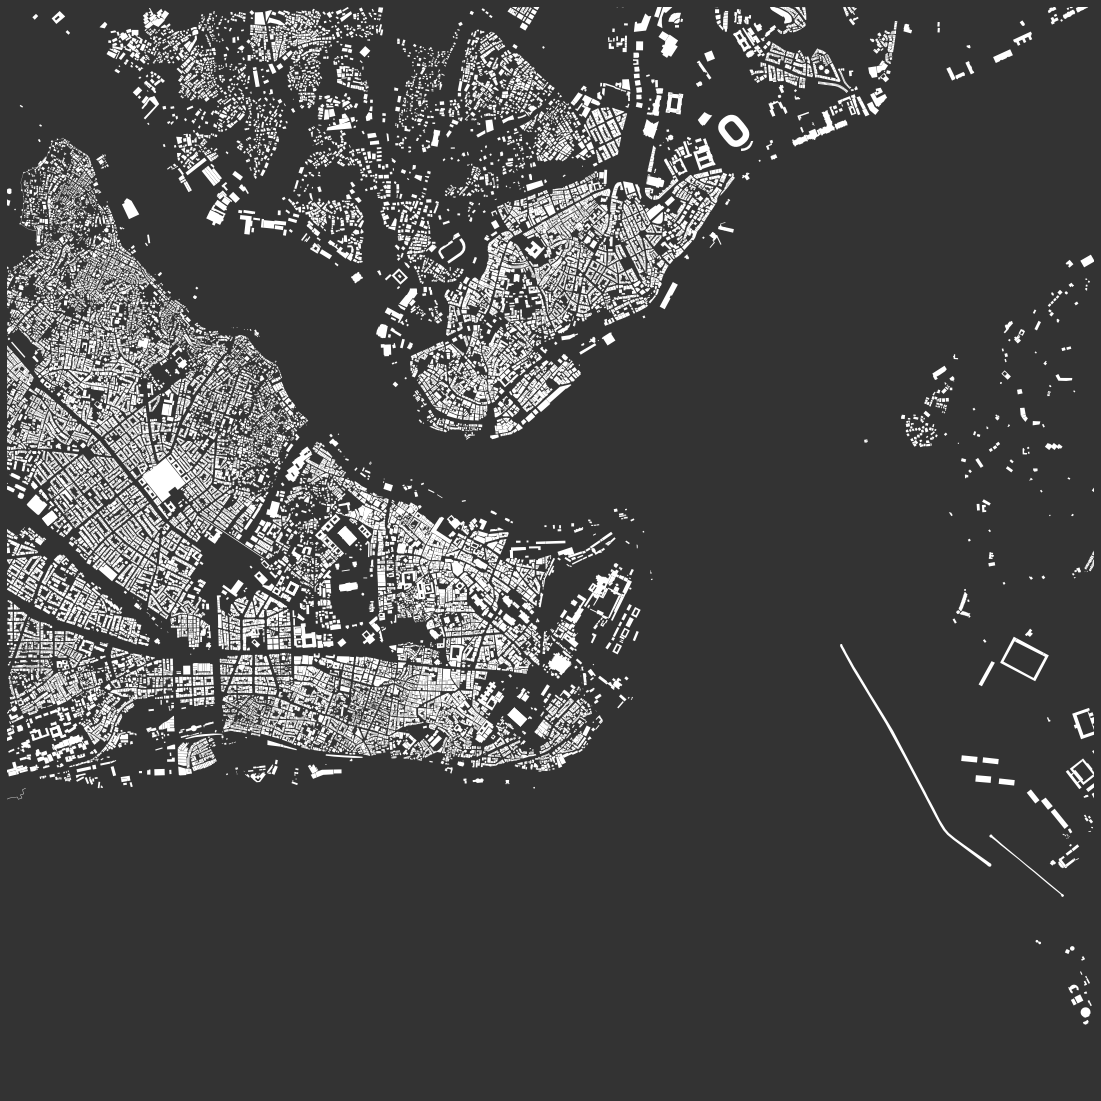

In [0]:
#@title Centered on Hagia Sophia (41.008469, 28.980261)
#point = (41.008469, 28.980261) # Hagia Sophia
point=(41.015137, 28.979530) #Istanbul
#Area_in_KmSqur = 2 #@param {type:"slider", min:1, max:15, step:1}
Area_in_KmSqur=50
dist = int(np.sqrt(Area_in_KmSqur*1000000)/2) # distance from center to edges of box

gdf = ox.footprints.footprints_from_point(point=point, distance=dist)
gdf_proj = ox.project_gdf(gdf)
bbox = ox.bbox_from_point(point=point, distance=dist, project_utm=True)
fig, ax = ox.footprints.plot_footprints(gdf_proj, bgcolor='#333333', color='w', figsize=(20,20), bbox=bbox, show=True)
plt.show()


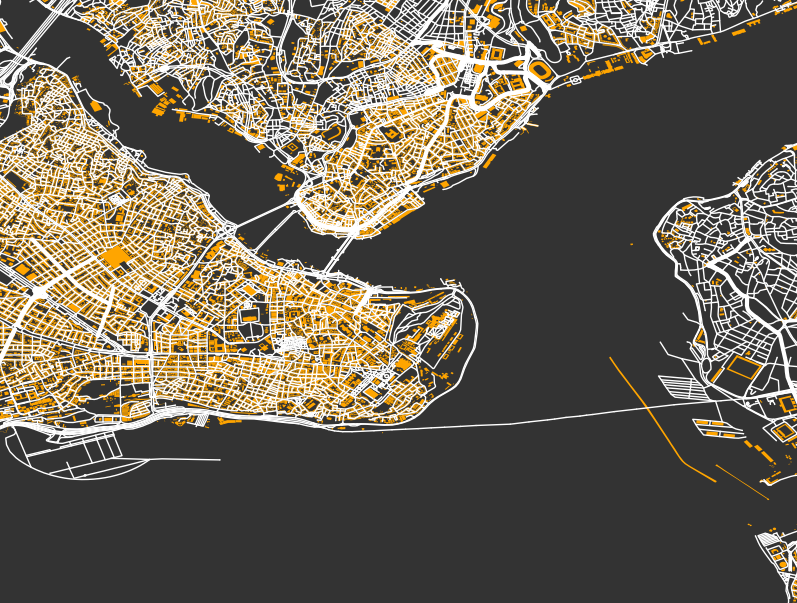

In [0]:
#path = make_plot(place = 'Hagia_Sophia',point = (41.008469, 28.980261),dist = dist, gdf=gdf, network_type='all', default_width=1, street_widths={'secondary':3})
path = make_plot(place = 'Istanbul',point = point,dist = dist, gdf=gdf, network_type='all', default_width=1, street_widths={'secondary':3})
Image(path, height=600, width=600)

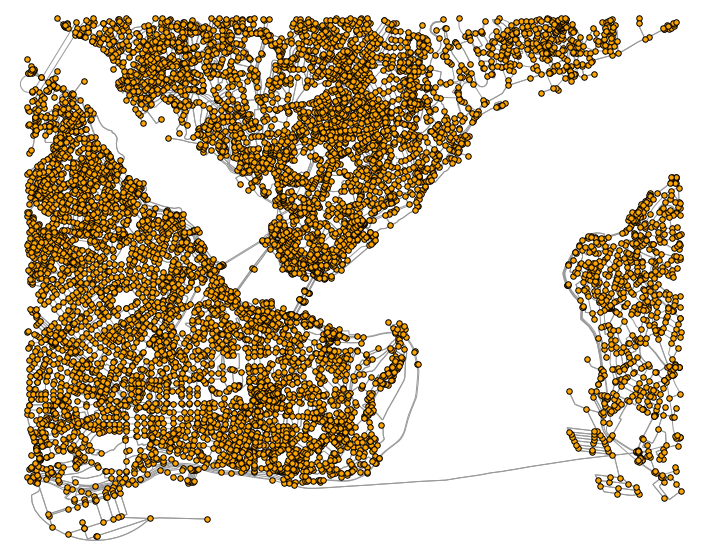

NumNodes:9043,
NumEdges:23384


In [0]:
# retrieve map data as a graph of nodes and edges
G = ox.core.graph_from_point(center_point=point, distance = dist)
fig, ax = ox.plot_graph(G, fig_height=10, node_color='orange', node_size=30, node_zorder=2, node_edgecolor='k')
plt.show()
print(f'NumNodes:{G.number_of_nodes()},\nNumEdges:{G.number_of_edges()}')


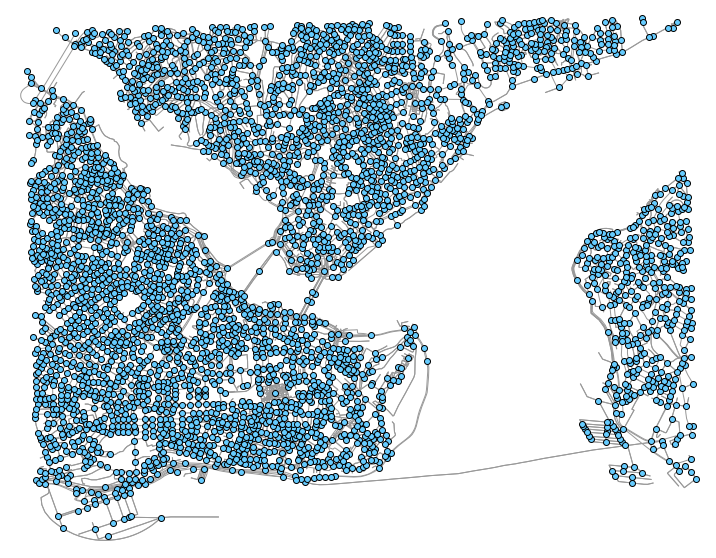

NumNodes:9043,
NumEdges:23384


In [0]:
# clean up the intersections and extract their xy coords
G = ox.project_graph(G)
intersections = ox.clean_intersections(G, tolerance=15, dead_ends=False)
points = np.array([point.xy for point in intersections])

# plot the cleaned-up intersections
fig, ax = ox.plot_graph(G, fig_height=10, show=False, close=False, node_alpha=0)
ax.scatter(x=points[:,0], y=points[:,1], zorder=2, color='#66ccff', edgecolors='k')
plt.show()
print(f'NumNodes:{G.number_of_nodes()},\nNumEdges:{G.number_of_edges()}')

In [0]:
#edges_df.name.apply(lambda x: 'has_name' if isinstance(x,str) else 'NA').value_counts()
